In [ ]:
import tensorflow as tf

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from string import punctuation
from sklearn.model_selection import train_test_split
#STOPWORDS = set(stopwords.words('portuguese'))

STOPWORDS = set(stopwords.words('portuguese') + list(punctuation))


In [ ]:
# Parâmetros Principais

# Tamanho do vocabulário a ser criado com o tokenizer. Este considera as N palavras mais comuns (ou frequentes nos textos)
vocab_size = 5000 # 2500 / 10000

# Tamanho do vetor de características que representa cada palavra. Cada palavra é transformada para um vetor com 64 entradas.
embedding_dim = 128  # 64 / 256 

# Tamanho máximo da sequência de códigos que representa um texto (tamanho do feature vector)
max_length = 20  # 15 / 25

# Tipo de truncagem a ser utilizado, 'post' significa remover valores do final da sequência.
trunc_type = 'post'

# Tipo de padding a ser utilizado, 'post' significa completar no final da sequência.
padding_type = 'post'

# Token a ser utilizado quando uma palavra não presente no vocabulário é encontrada no texto
Not_known = '<NKN>'

# Porcentagem de instâncias a ser utilizada no treinamento
training_portion = .7

In [ ]:
# Carrega os textos. Em X o texto de entrada e em y os rótulos.
# Cada linha do texto carregada é filtrada para retirada de stopwords.

def ler(file):
    with open(file, 'r', encoding='latin-1') as csvfile:
        texto = csv.reader(csvfile, delimiter=';')      # lê um texto do arquivo
        print(texto)
        next(texto)
        for linha in texto:       # processa cada linha do texto
            y.append(linha[2])
            aux = linha[0]
            for word in STOPWORDS:        # retirada de stopwords
                token = ' ' + word + ' '
                aux = aux.replace(token, ' ')
                aux = aux.replace(' ', ' ')
            X.append(aux)
X = []
y = []
ler('g1_v2_ws.csv')
ler('g1_v1_ws.csv')

print(len(y))       # quantidade de rótulos
print(len(X))       # quantidade de textos

dic = {'neutro':'positivo', 'alegria':'positivo', 'surpresa':'positivo', 'medo':'negativo', 'raiva':'negativo', 'desgosto':'negativo', 'tristeza':'negativo'}
y=[dic.get(n, n) for n in y]

print(y)

train_X, validation_X, train_y, validation_y = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)
print(train_y)
print(validation_y)
print(set(y))


2732
2732
['positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'posi

In [ ]:
# Cria o vocabulário a partir da base de treinamento considerando o tamanho definido em vocab_size.
# Utiliza como coringa o símbolo Not_known
tokenizer = Tokenizer(num_words = vocab_size, oov_token=Not_known)
tokenizer.fit_on_texts(train_X)
word_index = tokenizer.word_index
tokenizer.num_words

5000

In [ ]:
# Lista os N primeiros vocábulos do dicionários (os N mais frequentes)
N=1000
dict(list(word_index.items())[1:N])


In [ ]:
# Converte uma linha de texto em uma sequência de valores
train_sequences = tokenizer.texts_to_sequences(train_X)

In [ ]:
# Mostra uma linha de texto convertida para sequência de valores
# Cada valor representa uma palavra do vocabulário
print(train_X[5])
print(train_sequences[5])

França perdeu 138 mil empregos três meses: Perda trimestre maior todo ano passado. Demissões concentraram trabalhos temporários.
[842, 735, 3342, 17, 657, 44, 61, 1289, 80, 65, 364, 43, 279, 2497, 3343, 1290, 1908]


In [ ]:
# Transforma todas as sequências para um tamanho fixo. Sequências pequenas são completadas e sequências maiores que o limite são truncadas
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Imprime uma sequência
print(train_sequences[6])
print(train_padded[6])

[3344, 1114, 541, 1909, 424, 3345, 197, 3346, 1909, 507, 843, 391, 844, 3347, 3348]
[3344 1114  541 1909  424 3345  197 3346 1909  507  843  391  844 3347
 3348    0    0    0    0    0]


In [ ]:
# Tokeniza a base de validação.

validation_sequences = tokenizer.texts_to_sequences(validation_X)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

820
(820, 20)


In [ ]:
# Mostra o conjunto de rótulos
print(set(y))

{'negativo', 'positivo'}


In [ ]:
# Tokeniza os rótulos
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)

label_index = label_tokenizer.word_index
print(label_index)
#dict(list(label_index.items())[1:5])

# Observe que subtraímos 1 dos códigos para estes comecem em 0
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_y))-1
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_y))-1

{'negativo': 1, 'positivo': 2}


In [ ]:
print(training_label_seq[2])
print(train_sequences[2])
print(train_X[2])
print(training_label_seq[1])
print(training_label_seq[400])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[50])
print(validation_label_seq.shape)

[1]
[1110, 841, 11, 1111, 169, 731, 1, 732, 1, 131, 733, 1112, 1, 65, 656, 734, 949, 277, 61]
 Confiança consumidor EUA melhora junho Índice, calculado Universidade Michigan, ficou abaixo esperado. Otimismo maior momento atual próximos seis meses.
[1]
[1]
(1912, 1)
[0]
[0]
[0]
(820, 1)


In [ ]:
# Confere como ficaram as nossas frases depois de transformdas
# Apenas para conferência.

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[50]))
print('---')
print(train_X[50])
print(train_y[50])

<NKN> melhora oferta opel diz fonte governo alemão fabricante canadense <NKN> quer <NKN> europeia gm investimento aquisição us <NKN> milhões
---
 Magna melhora oferta Opel, diz fonte governo alemão Fabricante canadense autopeças quer filiar europeia GM. Investimento aquisição US$ 713 milhões.
positivo


In [ ]:

# Criando a rede LSTM (Long Short Term Memory)

hidden_size=64
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(embedding_dim, dropout = 0.25 , return_sequences=True))
model.add(tf.keras.layers.LSTM(embedding_dim, dropout = 0.25))
#model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compilando a LSTM
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento da LSTM
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

model.summary()

Epoch 1/20
60/60 - 19s - loss: 0.5844 - accuracy: 0.6742 - val_loss: 0.5157 - val_accuracy: 0.7354 - 19s/epoch - 316ms/step
Epoch 2/20
60/60 - 3s - loss: 0.2795 - accuracy: 0.8828 - val_loss: 0.4387 - val_accuracy: 0.7988 - 3s/epoch - 53ms/step
Epoch 3/20
60/60 - 4s - loss: 0.1757 - accuracy: 0.9331 - val_loss: 0.5619 - val_accuracy: 0.7915 - 4s/epoch - 63ms/step
Epoch 4/20
60/60 - 2s - loss: 0.1316 - accuracy: 0.9482 - val_loss: 0.8097 - val_accuracy: 0.8037 - 2s/epoch - 39ms/step
Epoch 5/20
60/60 - 2s - loss: 0.1038 - accuracy: 0.9529 - val_loss: 0.5369 - val_accuracy: 0.8061 - 2s/epoch - 30ms/step
Epoch 6/20
60/60 - 2s - loss: 0.0717 - accuracy: 0.9545 - val_loss: 1.2328 - val_accuracy: 0.8146 - 2s/epoch - 33ms/step
Epoch 7/20
60/60 - 1s - loss: 0.0800 - accuracy: 0.9603 - val_loss: 0.9533 - val_accuracy: 0.8098 - 1s/epoch - 23ms/step
Epoch 8/20
60/60 - 1s - loss: 0.0770 - accuracy: 0.9555 - val_loss: 0.9393 - val_accuracy: 0.8098 - 874ms/epoch - 15ms/step
Epoch 9/20
60/60 - 1s - lo

In [ ]:
# Testando uma frase

txt = ["Carro mata hovem"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
labels = ['negativo', 'positivo']
print(pred, labels[np.argmax(pred)])

print("Resultado na validacao:")
score=model.evaluate(validation_padded, validation_label_seq, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



1/1 [==============================] - 1s 631ms/step
[[9.9999654e-01 3.4039115e-06]] negativo
Resultado na validacao:
Test loss: 1.4675143957138062
Test accuracy: 0.8085365891456604


In [ ]:
# Criando uma RNN (Recurrent Neural Network)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(tf.keras.layers.SimpleRNN(units=64))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.summary() 

# Compilando a RNN
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento da RNN
history = model.fit(train_padded, training_label_seq, batch_size=32, epochs=20, validation_data=(validation_padded, validation_label_seq), verbose=2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 64)            320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 336,706
Trainable params: 336,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60/60 - 12s - loss: 0.6409 - accuracy

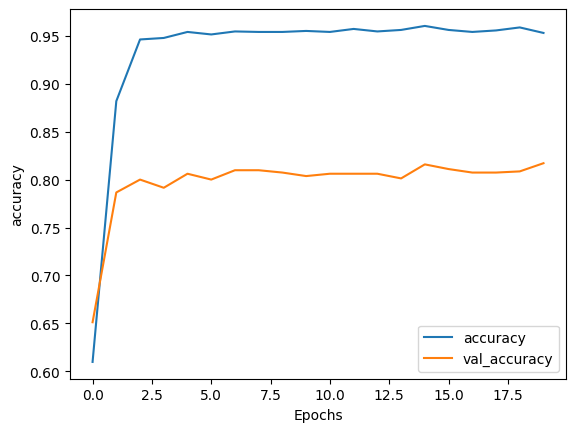

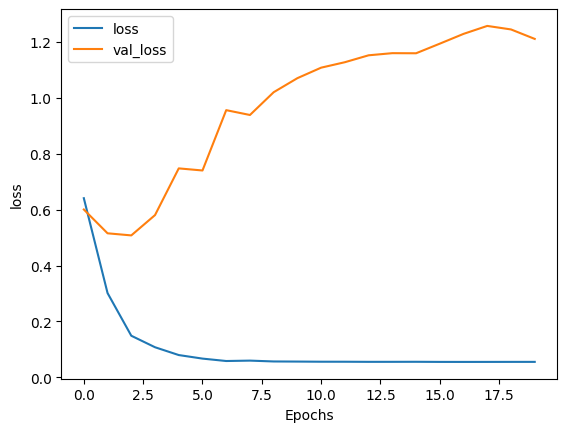

In [ ]:
# Imprime gráfico histórico do treinamento
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
  

In [ ]:
# Testando uma frase

txt = ["Carro mata hovem"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
labels = ['negativo', 'positivo']
print(pred, labels[np.argmax(pred)])

print("Resultado na validacao:")
score=model.evaluate(validation_padded, validation_label_seq, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



1/1 [==============================] - 0s 138ms/step
[[9.9971348e-01 2.8649275e-04]] negativo
Resultado na validacao:
Test loss: 1.2107317447662354
Test accuracy: 0.8170731663703918


In [ ]:
# Plotar a matrix de confusão 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

26/26 [==============================] - 0s 3ms/step
Confusion matrix, without normalization


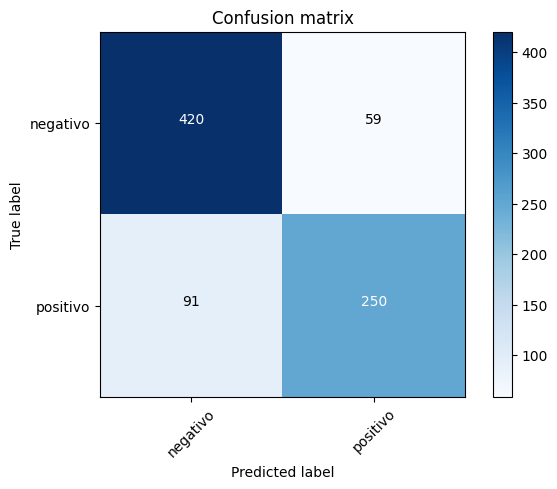

In [ ]:
# Preparar Matriz de Confusão
import itertools
from sklearn.metrics import confusion_matrix
y_predict=model.predict(validation_padded)

class_predicted = np.argmax(y_predict, axis=1)

val=validation_label_seq.reshape(len(validation_label_seq))
cm=confusion_matrix(val, class_predicted)
cm_plot_labels=['negativo', 'positivo']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')
